# Analyzing the Impact of Genres on IMDb Ratings

In this analysis, we will investigate whether movie genres significantly impact IMDb ratings. Using the IMDb Top 1000 Worst Rated Titles dataset, we will:

1. Perform one-way ANOVA to test the relationship between genres and ratings.
2. Visualize the ANOVA results and genre distributions using various plots.


## Step 1: Load and Explore the Dataset

We will start by loading the dataset and performing basic data cleaning to extract the primary genre and filter necessary columns.


In [12]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.anova import AnovaRM
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Loading dataset
df = pd.read_csv("IMDBWorst1000.csv")
df.head()

,id,title,genres,averageRating,numVotes,releaseYear
0,tt5988370,Reis,"Biography, Drama",1.0,74178,2017
1,tt7221896,Cumali Ceber: Allah Seni Alsin,Comedy,1.0,39471,2017
2,tt13423846,321 Action,Drama,1.0,10222,2020
3,tt20255706,The Pogmentary,"Biography, Documentary, Sport",1.1,13800,2022
4,tt21403988,The Last Pharaoh,"Documentary, Drama, History",1.1,12039,2023


In [15]:
#Extracting primary genres and filtering out invalid rows
df['Primary Genre'] = df['genres'].str.split(',').str[0]
df = df[['Primary Genre', 'averageRating']].dropna()
df


,Primary Genre,averageRating
0,Biography,1.0
1,Comedy,1.0
2,Drama,1.0
3,Biography,1.1
4,Documentary,1.1
...,...,...
995,Comedy,5.2
996,Horror,5.2
997,Action,5.2
998,Action,5.2


C:\Users\Ethan\AppData\Local\Temp\ipykernel_24024\366903298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Primary Genre', y='averageRating', data=df, palette="Set3")


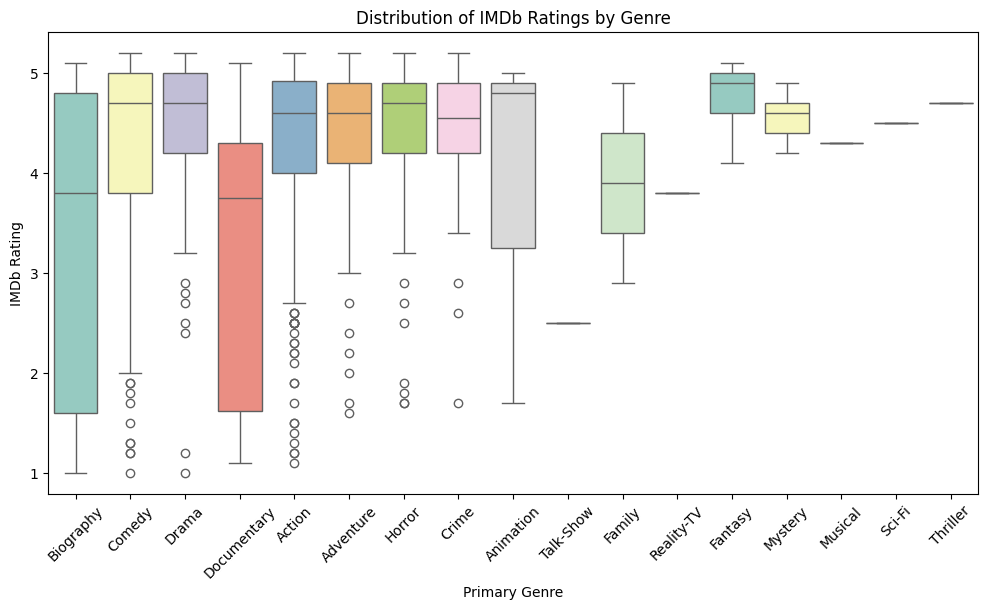

In [18]:
#Grouping ratings by genre
genre_groups = [group['averageRating'].values for _, group in df.groupby('Primary Genre')]

#Visualizing distribution of ratings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Primary Genre', y='averageRating', data=df, palette="Set3")
plt.title('Distribution of IMDb Ratings by Genre')
plt.xlabel('Primary Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()

## Step 2: Perform ANOVA

We will use one-way ANOVA to test if genres significantly influence IMDb ratings. The null hypothesis is that genres have no effect on ratings, while the alternative hypothesis is that genres do affect ratings.


In [19]:
#Performing one-way ANOVA
anova_result = f_oneway(*genre_groups)
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

F-statistic: 3.39
P-value: 0.0000


In [21]:
#Making an ANOVA Table using Statsmodels
model = ols('Q("averageRating") ~ C(Q("Primary Genre"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

#Displaying ANOVA Table
print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
                           sum_sq     df         F    PR(>F)
C(Q("Primary Genre"))   41.632601   16.0  3.387413  0.000007
Residual               755.090439  983.0       NaN       NaN


### ANOVA Result:
- **F-statistic**: The value of the test statistic.
- **P-value**: Indicates if the result is statistically significant. A p-value < 0.05 means the genres significantly impact IMDb ratings.

If the null hypothesis is rejected, we conclude that genres have a significant impact.


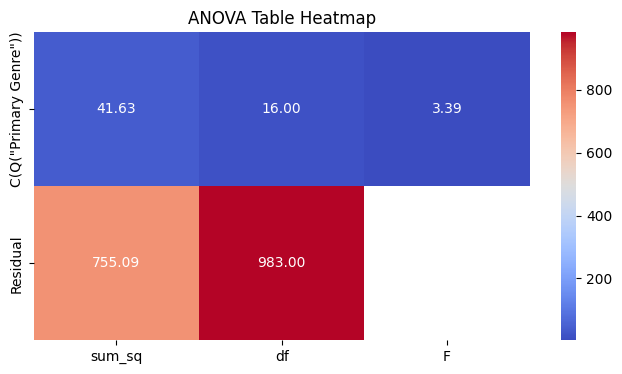

In [22]:
#Visualizing the ANOVA Table
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(anova_table.iloc[:, :-1], annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
plt.title("ANOVA Table Heatmap")
plt.show()

In [23]:
#Checking significance of genre on rating
if anova_result.pvalue < 0.05:
    print("Significant impact of genre on IMDb ratings.")
else:
    print("No significant impact of genre on IMDb ratings.")

Significant impact of genre on IMDb ratings.


## Conclusion

The results of our analysis reveal the following:

- The p-value obtained from the one-way ANOVA test is **0.000007**, which is far below the significance level of 0.05.  
- This indicates that there is a **statistically significant impact of genres on IMDb ratings**.  
- The visualizations further highlight distinct differences in the distribution of ratings across genres, reinforcing the conclusion that genres play a critical role in determining IMDb ratings.

In summary, genres are an important factor in understanding the variation in IMDb ratings for the worst-rated movies.
